# Benchmarking Sophia

This benchmark compares the performances of the basic [sophia](https://github.com/pchampin/sophia_rs) graphs
with the Sophia HDT adapter.

It was executed on an Intel® Core™ i9-12900K CPU with 8 p + 8 e cores, 24 threads and 32 GiB of RAM.
See [benchmark_results.ipynb](./benchmark_results.ipynb) for more results on the tested configurations.

In [6]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
from plot_utils import *

## The `query` test

This test consists in loading an N-Triple file in memory,
and querying all the triples with a given subject and object.

It has been tested with the following tools:

* `jena`: [Apache Jena](http://jena.apache.org/) 4.9.0
* `n3js`: [N3.js](https://github.com/rdfjs/N3.js#readme) 1.17.1
* `librdf`: [librdf](http://librdf.org/) 1.0.17-8
* `python`: [RDFlib](http://rdflib.readthedocs.org/) 6.2.0
* `sophia`: [sophia](https://github.com/pchampin/sophia_rs) v0.8.1-alpha
  (using [FastGraph](https://docs.rs/sophia/latest/sophia/graph/inmem/type.FastGraph.html))*
* `sophia_lg`: [sophia](https://github.com/pchampin/sophia_rs) v0.8.1-alpha
  (using [LightGraph](https://docs.rs/sophia/latest/sophia/graph/inmem/type.LightGraph.html))*
* `sophia_hdt`: [hdt](https://github.com/konradhoeffner/hdt) 0.1.4 with sophia v0.8.1-alpha
* `hdt_rs`: [hdt](https://github.com/konradhoeffner/hdt) 0.1.4
* `hdt_java`: [hdt_java](https://github.com/rdfhdt/hdt-java) 3.0.10
* `hdt_cpp`: [hdt_cpp](https://github.com/rdfhdt/hdt-cpp) master fbcb31a
* `rdf4cpp`: [rdf4cpp](https://github.com/rdf4cpp/rdf4cpp) 0.0.18

Environment:

* rustc 1.74.0-nightly 2023-09-06, -C target-cpu=native
* OpenJDK 21
* Node.js v16.20.2
* Python 3.11.5
* clang 16.0.6
* gcc 13.2.1

## All

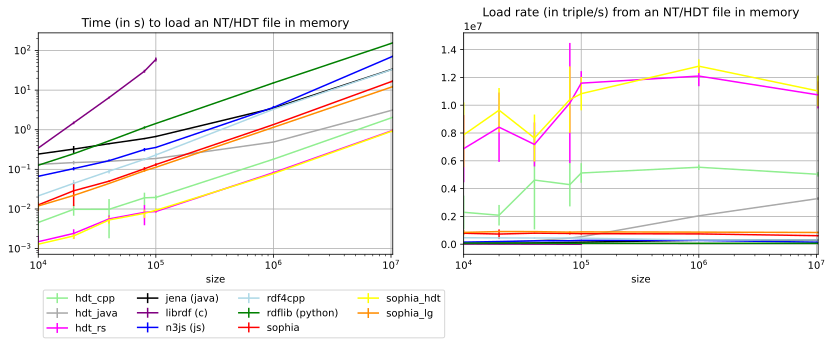

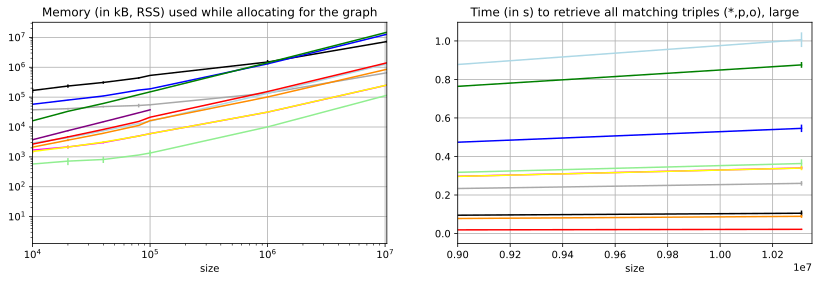

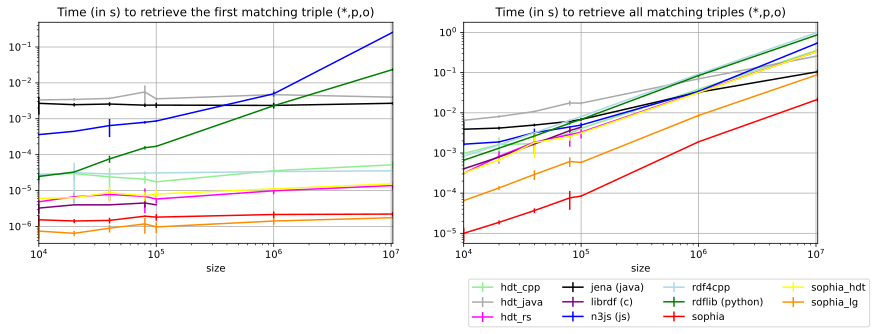

In [12]:
plot_query_stats(load_data("query", "sophia", "sophia_lg", "sophia_hdt", "hdt_rs", "hdt_java","hdt_cpp", "jena", "python", "n3js", "librdf", "rdf4cpp" ), group=True)

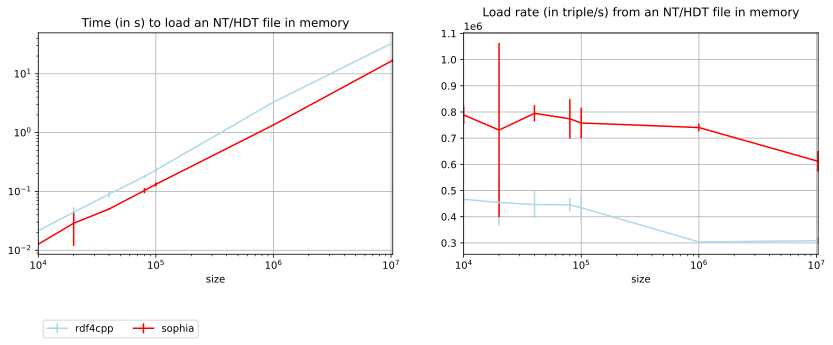

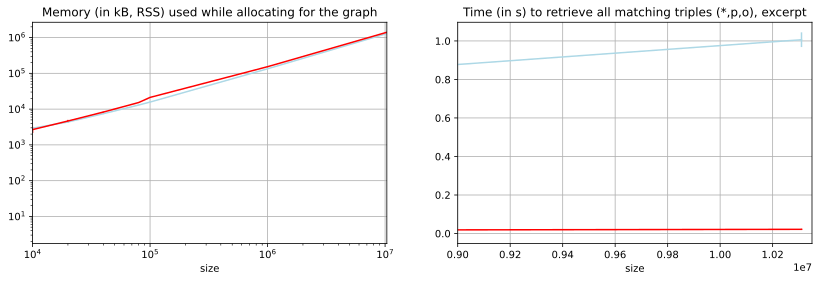

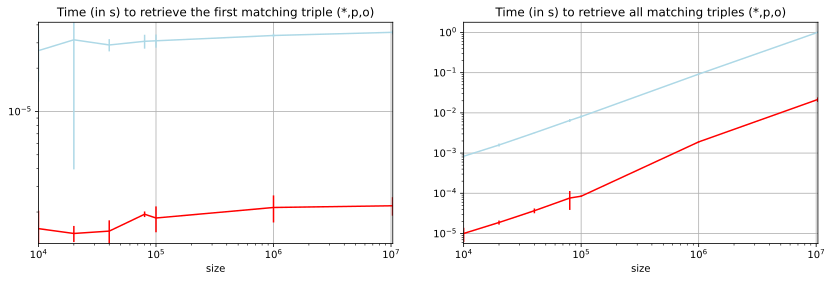

In [3]:
plot_query_stats(load_data("query", "sophia", "rdf4cpp" ), group=True)

## Non-HDT

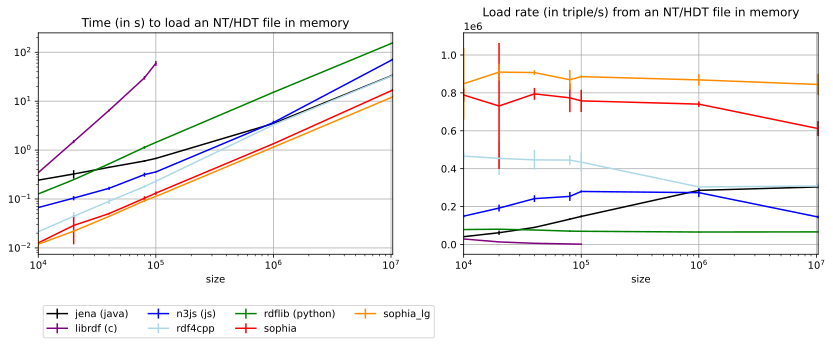

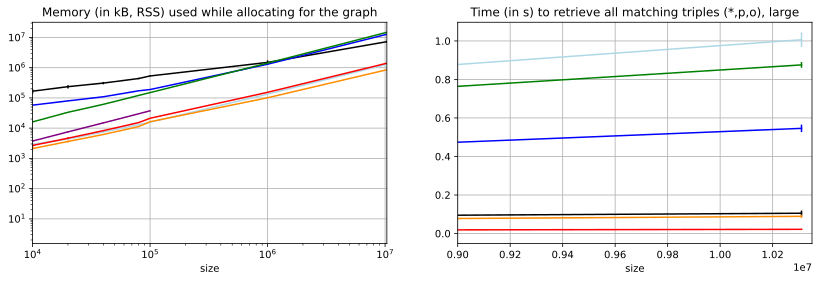

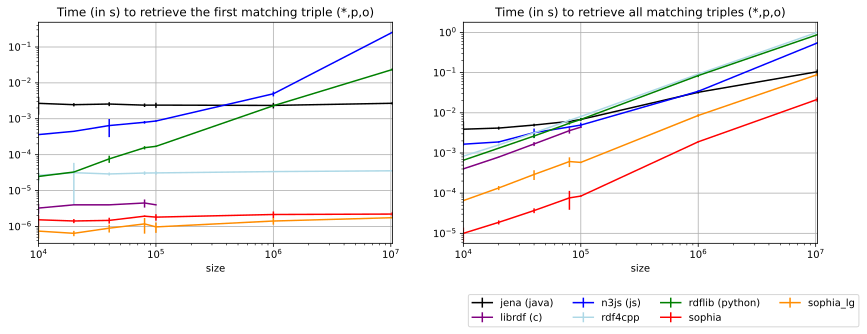

In [8]:
plot_query_stats(load_data("query", "sophia", "sophia_lg", "jena", "python", "n3js", "librdf", "rdf4cpp" ), group=True)

## HDT

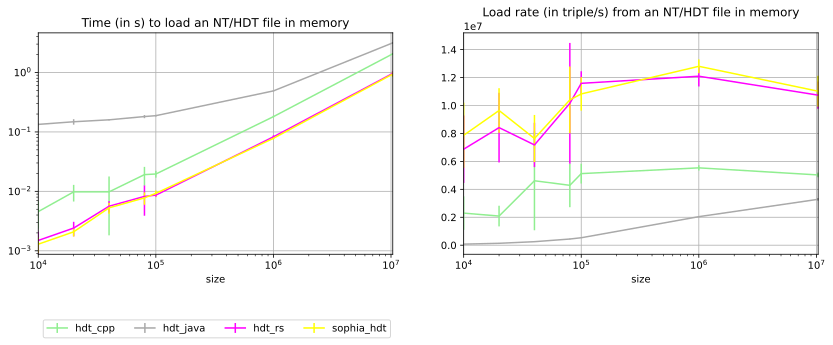

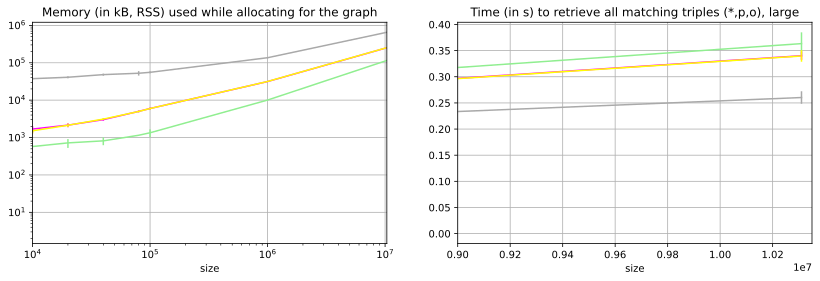

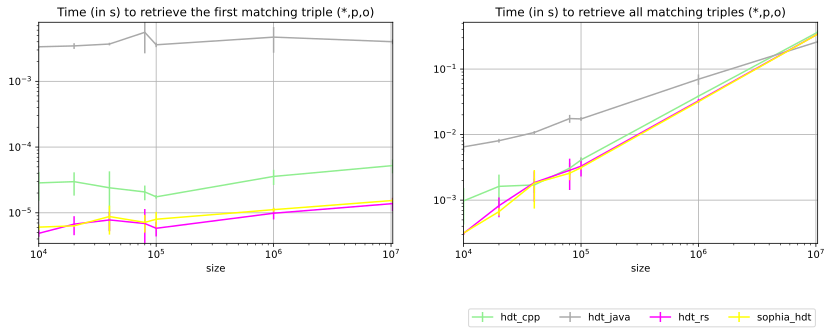

In [9]:
plot_query_stats(load_data("query", "sophia_hdt", "hdt_rs", "hdt_java","hdt_cpp"), group=True)

## 10M Triples

Time (in ms) and Memory (MB) to load and query 10M triples with a (*,p,o) pattern.

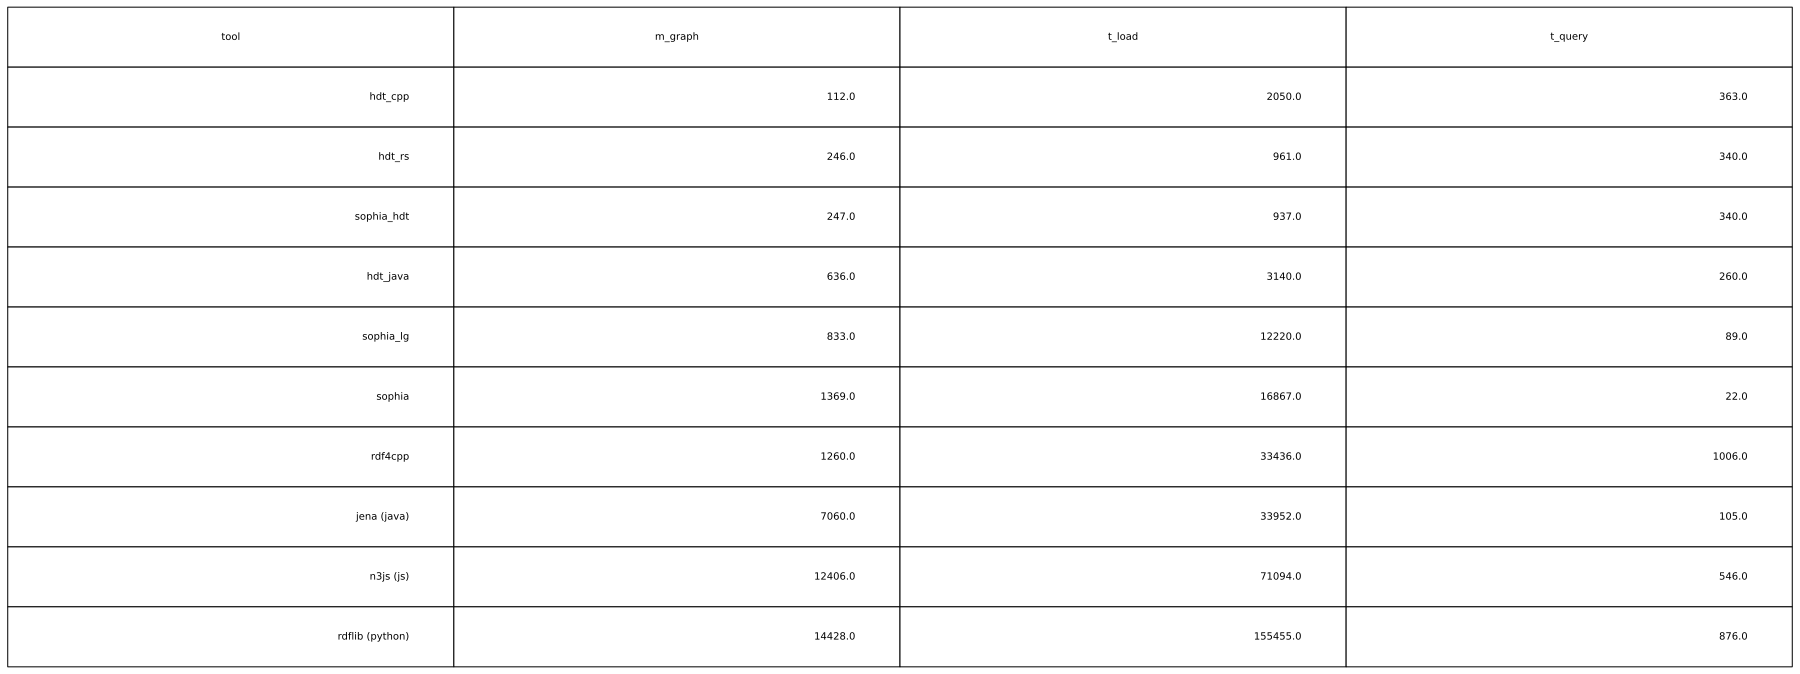

|    | tool            |   m_graph |   t_load |   t_query |
|---:|:----------------|----------:|---------:|----------:|
|  0 | hdt_cpp         |       112 |     2050 |       363 |
|  1 | hdt_rs          |       246 |      961 |       340 |
|  2 | sophia_hdt      |       247 |      937 |       340 |
|  3 | hdt_java        |       636 |     3140 |       260 |
|  4 | sophia_lg       |       833 |    12220 |        89 |
|  5 | sophia          |      1369 |    16867 |        22 |
|  6 | rdf4cpp         |      1260 |    33436 |      1006 |
|  7 | jena (java)     |      7060 |    33952 |       105 |
|  8 | n3js (js)       |     12406 |    71094 |       546 |
|  9 | rdflib (python) |     14428 |   155455 |       876 |


In [11]:
plot_table( "hdt_cpp", "hdt_rs", "sophia_hdt", "hdt_java", "sophia_lg", "sophia", "rdf4cpp", "jena", "n3js", "python")